<a href="https://colab.research.google.com/github/OluPaul22/gis/blob/main/ps_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify
!pip install adjustText

In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis


import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from adjustText import adjust_text
from matplotlib.patheffects import withStroke #Import the withStroke object.

In [4]:
#!python --version
gpd.__version__

'1.0.1'

# **PS 1**

In [5]:
#Camden County Map by Zip Codes
! wget -q -O CamCounty_ZipCode.zip https://docs.google.com/uc?id=1i9D-XX2kKX91PB_4hvxtV8nQWJwYD4Zx&export=download

zip_ref = zipfile.ZipFile('CamCounty_ZipCode.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
Camden=gpd.read_file('Zip_Codes.shp') #load the shapefile with gpd as njC


<Axes: >

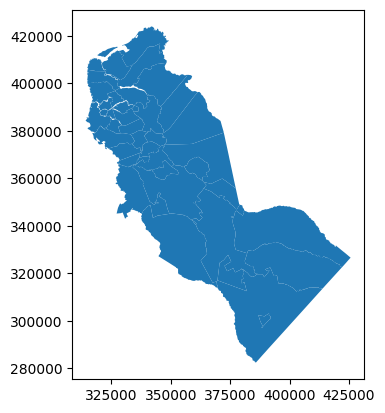

In [6]:
#make the map
Camden.plot()

In [7]:
Camden.dtypes

,0
OBJECTID,int32
STATEFP00,object
ZCTA5CE00,object
GEOID00,object
CLASSFP00,object
MTFCC00,object
FUNCSTAT00,object
ALAND00,int32
AWATER00,int32
INTPTLAT00,object


In [8]:
Camden.head(2)

,OBJECTID,STATEFP00,ZCTA5CE00,GEOID00,CLASSFP00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,PARTFLG00,Shape__Are,Shape__Len,geometry
0,1,34,08037,3408037,B5,G6350,S,322925446,3716474,+39.6359182,-074.7730671,N,7.979784e+08,213406.960247,"MULTIPOLYGON (((425020.828 325860.984, 425270...."
1,2,34,08081,3408081,B5,G6350,S,57694291,454445,+39.7390937,-074.9837406,N,5.963919e+08,175223.702763,"MULTIPOLYGON (((369792.32 313592.85, 369793.13..."


In [9]:
#The point locations of private, public and charter schools in Camden county, NJ
! wget -q -O Camden_Schools.zip https://docs.google.com/uc?id=119EGHtBVnX41qhdBtmrGeObS_Ov4Hcfk&export=download

zip_ref = zipfile.ZipFile('Camden_Schools.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
cmdsch=gpd.read_file('Schools.shp') #load the shapefile with gpd as njC

<Axes: >

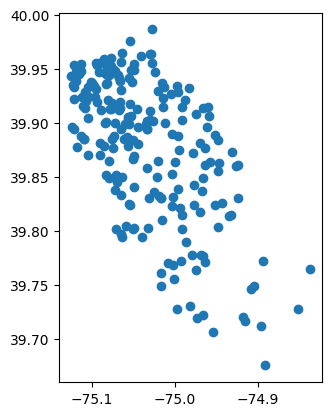

In [10]:
#make the map
cmdsch.plot()

In [11]:
cmdsch.loc[:, 'ZIP_TRUNC'] = cmdsch['ZIP_TRUNC'].astype(int)

In [12]:
cmdsch.head(2)

,OBJECTID_1,OBJECTID,COUNTYCODE,COUNTY,DIST_CODE,DIST_NAME,SCHOOLCODE,SCHOOLTYPE,SCHOOL,ADDRESS1,...,SOURCE,ZIP_TRUNC,PREF_ID_NU,GNIS_ID,LOC_QUAL,OGIS_ID,CATEGORY,SCHOOLNAME,LAST_UPDAT,geometry
0,1,2512,07,CAMDEN,0580,Brooklawn Public School District,010,ELEMENTARY SCHOOL,ALICE COSTELLO E.S.,301 Haakon rd.,...,PUBLIC,8030,0580-010-07,None,H,07-0580-010,3,Alice Costello Elementary School,2017-03-02,POINT (-75.11856 39.87817)
1,2,2513,07,CAMDEN,0680,Camden City Public Schools,301,ELEMENTARY SCHOOL,HENRY L. BONSALL FAMILY SCHOOL,1575 Mount Ephraim Avenue,...,PUBLIC,8104,0680-301-07,None,H,07-0680-301,3,Bonsall Elementary School,2017-03-02,POINT (-75.106 39.9254)


CRS for Camden:  EPSG:3424
CRS for Camden Schools:  EPSG:4326


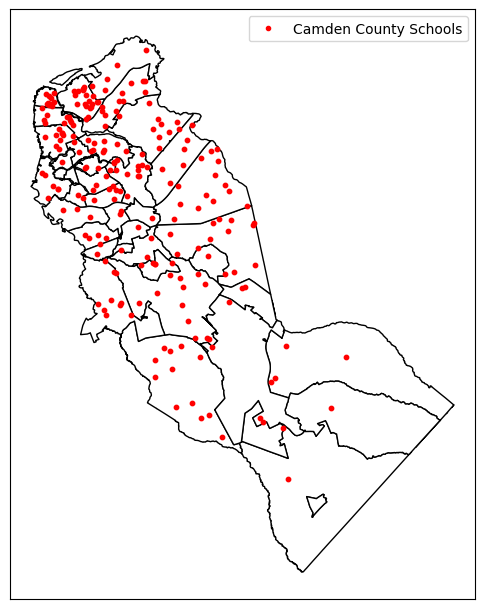

In [13]:
# Load your data (ensure these paths are correct)
Camden=gpd.read_file('Zip_Codes.shp')
cmdsch=gpd.read_file('Schools.shp')

# Ensure both GeoDataFrames use the same CRS
print("CRS for Camden: ", Camden.crs)
print("CRS for Camden Schools: ", cmdsch.crs)

# If CRS do not match, align them
cmdsch = cmdsch.to_crs(Camden.crs)

# Plotting
fig, ax = plt.subplots(1, figsize=(6, 10))
Camden.plot(ax=ax, color='white', edgecolor='black', linewidth=1)
cmdsch.plot(ax=ax, marker='o', color='red', markersize=10, legend=True)

# Set limits if necessary (optional, adjust as needed)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

ax.set_xticks([])
ax.set_yticks([])


# Custom legend
legend_handle = Line2D([0], [0], label='Camden County Schools', marker='o', markersize=3,
                       markeredgecolor='r', markerfacecolor='r', linestyle='')

plt.legend(handles=[legend_handle])
plt.show();


CRS for Camden:  EPSG:3424
CRS for Camden Schools:  EPSG:4326


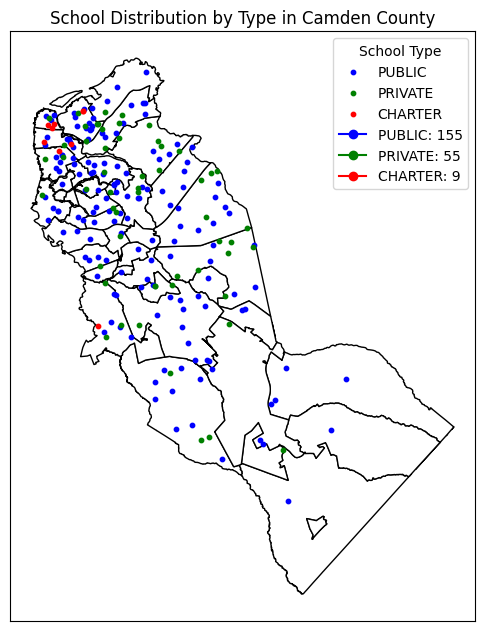

In [14]:
# Load your data
Camden = gpd.read_file('Zip_Codes.shp')
cmdsch = gpd.read_file('Schools.shp')

# Ensure both GeoDataFrames use the same CRS
print("CRS for Camden: ", Camden.crs)
print("CRS for Camden Schools: ", cmdsch.crs)
cmdsch = cmdsch.to_crs(Camden.crs)

# Define color map and prepare legend info
color_map = {
    'PUBLIC': 'blue',
    'PRIVATE': 'green',
    'CHARTER': 'red'
}

# Plotting the Camden map
fig, ax = plt.subplots(1, figsize=(6, 10))
Camden.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Calculate the total number of schools and prepare the legend labels
total_schools = len(cmdsch)
legend_labels = []

# Plot schools by type
for school_type, color in color_map.items():
    # Filter schools by type
    school_data = cmdsch[cmdsch['SOURCE'] == school_type]
    if not school_data.empty:
        school_data.plot(ax=ax, marker='o', color=color, markersize=10, label=school_type)

        # Count and calculate percentage
        count = len(school_data)
        percentage = (count / total_schools) * 100
        legend_labels.append(f"{school_type}: {count} ({percentage:.2f}%)")

# Adding a custom legend for school types
for school_type, color in color_map.items():
    plt.plot([], [], marker='o', color=color, label=f"{school_type}: {len(cmdsch[cmdsch['SOURCE'] == school_type])}")

# Add the legends to the plot
plt.legend(title="School Type", loc='upper right')
plt.title("School Distribution by Type in Camden County")
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show();


## In spite of the fact that Winslow, Chesilhurst, Waterford Works, and even Pine Hill have big land mass, they have fewer numbers of schools. Also, almost all the Charter Schools are in Camden

In [15]:
! wget -q -O School_Districts_-_Unified_for_NJ%2C_3424.zip https://docs.google.com/uc?id=1gyj7YPk97WcCxU91ouoEb7cwenGe-k8h&export=download
zip_ref = zipfile.ZipFile('School_Districts_-_Unified_for_NJ%2C_3424.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_utscds=gpd.read_file('School_Districts_-_Unified_for_NJ%2C_3424.shp') #load the shapefile with gpd as njC



<Axes: >

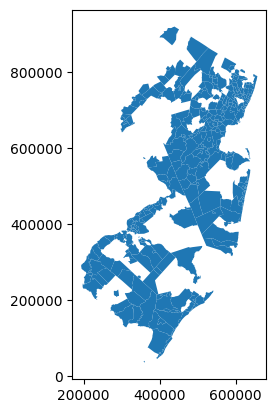

In [17]:
nj_utscds.plot()

In [16]:
nj_utscds.head(2)

,OBJECTID,NJDOE_ID_U,DIST_NAME,UNSDLEA,SD_TYPE,GEOID,Shape__Are,Shape__Len,geometry
0,1,05-5805,Willingboro Public School District,18000,U,3418000,2.262492e+08,75862.588039,"POLYGON ((386370.414 440959.026, 389173.931 44..."
1,2,23-4920,South River Public School District,15390,U,3415390,8.158761e+07,55879.624865,"POLYGON ((524300.577 593657.109, 524249.62 593..."


In [18]:
nj_utscds['NJDOE_ID_U'] = nj_utscds['NJDOE_ID_U'].str[3:]

nj_utscds['NJDOE_ID_U'] = nj_utscds['NJDOE_ID_U'].astype(int)

In [19]:
nj_utscds.dtypes

,0
OBJECTID,int32
NJDOE_ID_U,int64
DIST_NAME,object
UNSDLEA,object
SD_TYPE,object
GEOID,object
Shape__Are,float64
Shape__Len,float64
geometry,geometry


In [20]:
nj_utscds = nj_utscds.rename(columns={'NJDOE_ID_U': 'dist_code'}) ## to rename

njutscds=nj_utscds[['dist_code','DIST_NAME','GEOID','geometry']] ## keeping necessary variables


In [21]:
njutscds.head(2)

,dist_code,DIST_NAME,GEOID,geometry
0,5805,Willingboro Public School District,3418000,"POLYGON ((386370.414 440959.026, 389173.931 44..."
1,4920,South River Public School District,3415390,"POLYGON ((524300.577 593657.109, 524249.62 593..."


In [22]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

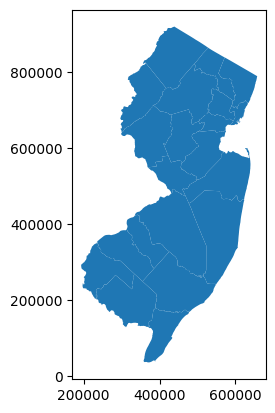

In [23]:
njC0.plot()

##Introduced this New Jersey map to overlay the United School District map on it in order to cover the missing spaces.

In [24]:
ppe=pd.read_stata('https://github.com/OluPaul22/data/blob/main/PPEDistrict.dta?raw=true')

In [25]:
ppe.dtypes

,0
countyname,object
district_code,object
district_name,object
PPE,int32
PPE_K,float32


In [26]:
ppe.head(2)

,countyname,district_code,district_name,PPE,PPE_K
0,Bergen,1270,Edgewater Boro,25061,25.061001
1,Bergen,3870,Oradell Boro,21465,21.465000


In [27]:
ppe = ppe.rename(columns={'district_code': 'dist_code'}) ## changing the name
ppe['dist_code'] = ppe['dist_code'].astype(int) ## making district code an integer

In [28]:
ppe.dtypes

,0
countyname,object
dist_code,int64
district_name,object
PPE,int32
PPE_K,float32


In [29]:
#merge function
nj_ppe = pd.merge(njutscds, ppe, on='dist_code',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec to see what merges and what did not merge)
## 'outer' will keep all the variables either it merges or did not
nj_ppe[['dist_code','PPE','_merge']] #all good, NEW JERSEY expected not to merge

,dist_code,PPE,_merge
0,5805,26449.0,both
1,4920,21975.0,both
2,1170,26896.0,both
3,3290,24880.0,both
4,1130,24257.0,both
...,...,...,...
667,6101,18775.0,right_only
668,6102,19119.0,right_only
669,7600,21869.0,right_only
670,8010,14672.0,right_only


In [30]:
#merge function
nj_ppe1 = pd.merge(njutscds, ppe, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [31]:
nj_ppe1.head(2)

,dist_code,DIST_NAME,GEOID,geometry,countyname,district_name,PPE,PPE_K
0,5805,Willingboro Public School District,3418000,"POLYGON ((386370.414 440959.026, 389173.931 44...",Burlington,Willingboro Twp,26449,26.448999
1,4920,South River Public School District,3415390,"POLYGON ((524300.577 593657.109, 524249.62 593...",Middlesex,South River Boro,21975,21.975000


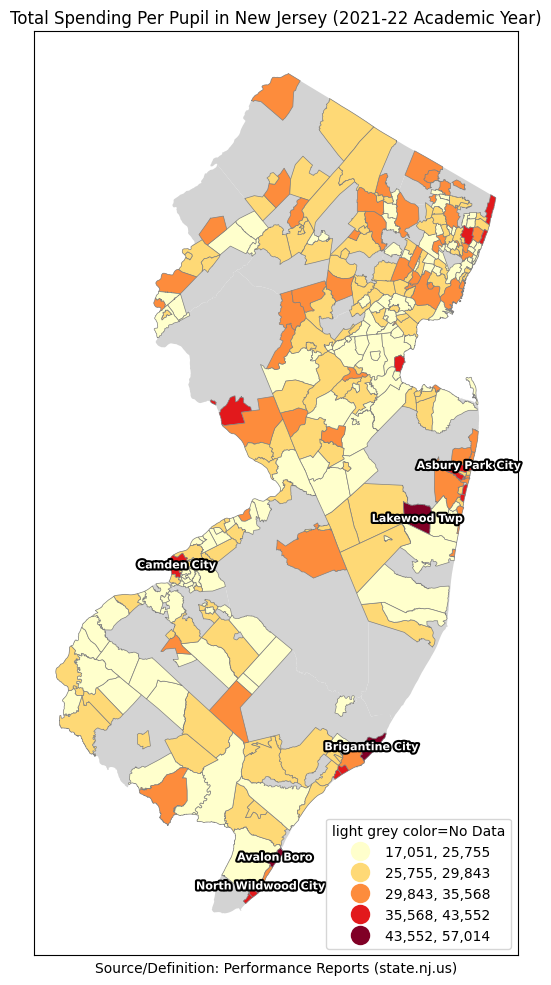

In [32]:
from matplotlib.patheffects import withStroke #Import the withStroke object.
# Load and prepare data
nj_ppe1 = nj_ppe1.to_crs(njC0.crs)
high_ppe = nj_ppe1[nj_ppe1['PPE'] >= 43552]

# Plotting
fig, ax = plt.subplots(1, figsize=(8, 12))
njC0.plot(ax=ax, color='lightgray', label='No data available')  # Base map with label for no data
nj_ppe1.plot(ax=ax, column='PPE', cmap='YlOrRd',
               scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True, # Added legend keyword argument
             legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

# Prepare texts and abbreviate "School District" to "SD"
texts = []
for idx, row in high_ppe.iterrows():
    rep_point = row.geometry.representative_point()
    district_name = row['district_name'].replace('School District', 'SD')  # Abbreviate name
    texts.append(ax.text(rep_point.x, rep_point.y, district_name, fontsize=8,
                         ha='center', va='center', color='white', fontweight='bold',
                         path_effects=[withStroke(linewidth=3, foreground='black')]))

# Add title and labels
ax.set_title("Total Spending Per Pupil in New Jersey (2021-22 Academic Year)")
ax.set_xticks([])  # Removes x-axis ticks
ax.set_yticks([])  # Removes y-axis ticks
ax.set_xlabel("Source/Definition: Performance Reports (state.nj.us)")

# Legend for missing values (set after your specific data plot if it uses a legend)
leg1 = ax.get_legend()
leg1.set_title("light grey color=No Data")  # Adjust this as you find appropriate for your visualization needs

# Optional: save the figure to a file
# plt.savefig('fig.pdf', bbox_inches='tight')
# files.download('fig.pdf')  # Uncomment if using in a Jupyter environment with file download capabilities

plt.show();

## Only a few School Districts have expend between $43,552 - $57,014 on their students: Asbury Park City, Avalon Boro, Brigantine City, Camden City, Lakewood Twp, North Wildwood City. So, I would love to find out if they serve more people from economically disadvantaged background or not.

In [33]:

econ_dis = pd.read_stata('https://github.com/OluPaul22/data/blob/main/econ_disadv.dta?raw=true')


In [34]:
econ_dis.head(2)

,countyname,district_code,district_name,econ_dis,female,male
0,Atlantic,0010,Absecon Public Schools District,38.7,52.0,48.0
1,Atlantic,0110,Atlantic City School District,70.4,45.0,55.0


In [35]:
econ_dis.dtypes

,0
countyname,object
district_code,object
district_name,object
econ_dis,float64
female,float32
male,float32


In [36]:
econ_dis = econ_dis.rename(columns={'district_code': 'dist_code'}) ## changing the name
econ_dis['dist_code'] = econ_dis['dist_code'].astype(int) ## making district code an integer

In [37]:
econ_dis.dtypes

,0
countyname,object
dist_code,int64
district_name,object
econ_dis,float64
female,float32
male,float32


In [38]:
#merge function
econdis = pd.merge(njutscds, econ_dis, on='dist_code',how='outer',indicator=True)
econdis[['dist_code','econ_dis','_merge']]

,dist_code,econ_dis,_merge
0,5805,56.3,both
1,4920,28.5,both
2,1170,16.3,both
3,3290,5.8,both
4,1130,4.5,both
...,...,...,...
678,8010,84.6,right_only
679,8050,10.9,right_only
680,8060,64.1,right_only
681,8065,78.3,right_only


In [39]:
#merge function
econdis1 = pd.merge(njutscds, econdis, on='dist_code',how='inner',indicator=False) ## inner only retains those that merge. so it will get rid of New Jersey.

In [40]:
econdis1.head(2)

,dist_code,DIST_NAME_x,GEOID_x,geometry_x,DIST_NAME_y,GEOID_y,geometry_y,countyname,district_name,econ_dis,female,male,_merge
0,5805,Willingboro Public School District,3418000,"POLYGON ((386370.414 440959.026, 389173.931 44...",Willingboro Public School District,3418000,"POLYGON ((386370.414 440959.026, 389173.931 44...",Burlington,Willingboro Public School District,56.3,41.0,59.0,both
1,4920,South River Public School District,3415390,"POLYGON ((524300.577 593657.109, 524249.62 593...",South River Public School District,3415390,"POLYGON ((524300.577 593657.109, 524249.62 593...",Middlesex,South River Public School District,28.5,50.0,50.0,both


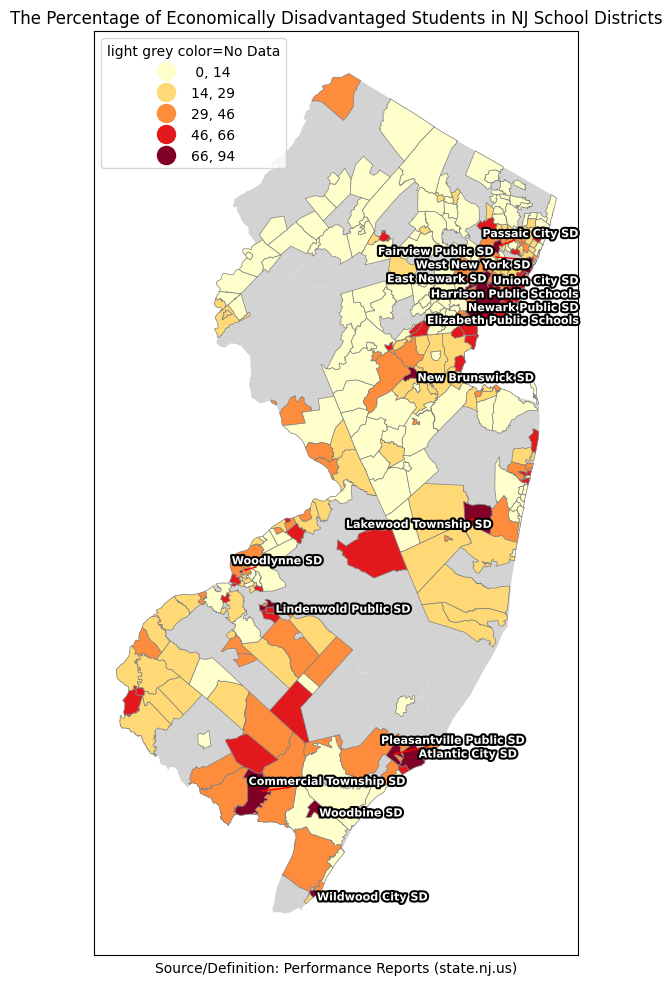

In [41]:
# Load and prepare data
econdis1 = econdis1.set_geometry('geometry_x')
econdis1 = econdis1.to_crs(njC0.crs)
high_disadv = econdis1[econdis1['econ_dis'] >= 66]

# Plotting
fig, ax = plt.subplots(1, figsize=(8, 12))
njC0.plot(ax=ax, color='lightgray', label='No data available')  # Base map with label for no data
econdis1.plot(ax=ax, column='econ_dis', cmap='YlOrRd',
               scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.5, legend=True, # Added legend keyword argument
             legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper left', 'markerscale': 1.4})

# Prepare texts and abbreviate "School District" to "SD"
texts = []
for idx, row in high_disadv.iterrows():
    rep_point = row.geometry_x.representative_point()
    district_name = row['district_name'].replace('School District', 'SD')  # Abbreviate name
    texts.append(ax.text(rep_point.x, rep_point.y, district_name, fontsize=8,
                         ha='center', va='center', color='white', fontweight='bold',
                         path_effects=[withStroke(linewidth=3, foreground='black')]))

# Use adjust_text to automatically adjust labels
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Add title and labels
ax.set_title("The Percentage of Economically Disadvantaged Students in NJ School Districts")
ax.set_xticks([])  # Removes x-axis ticks
ax.set_yticks([])  # Removes y-axis ticks
ax.set_xlabel("Source/Definition: Performance Reports (state.nj.us)")

# Legend for missing values (set after your specific data plot if it uses a legend)
leg1 = ax.get_legend()
leg1.set_title("light grey color=No Data")  # Adjust this as you find appropriate for your visualization needs

# Optional: save the figure to a file
# plt.savefig('fig.pdf', bbox_inches='tight')
# files.download('fig.pdf')  # Uncomment if using in a Jupyter environment with file download capabilities

plt.show();




## According to the previous PPE map, of all the school districts that spent a higher amount on students, only Lakewook Twp has a high percentage of economically disadvantaged students.

## We can establish that a significant amount was expended in all the school districts serving a higher percentage of economically disadvantaged students. However, we found that Commercial Township has a high percentage of economically disadvantaged students, yet its expenditure per pupil is very low.

## We also found that in North Jersey, where the district schools serve a lesser percentage of economically disadvantaged students, the total amount expended per pupil is high; however, in South Jersey, where we school districts serve high percentages of economically disadvantaged students, their total amount spent per pupil is quite low.